In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib notebook


# Uploading the data to serve as inputs with various formats

In [2]:
#uploads the data fills blanks with 0 
df=pd.read_csv("real_data_take3d.csv")
df=df.dropna(axis=0, how='all', thresh=None, subset=None, inplace=False)
df=df.fillna(value=0)
#groups = df.groupby('Phase')
#defines categorical dataset for category based modeling 
X = df[['Concentration', 'Time', 'Volume', 'Temperature', 'pH', 'BDFE']]
y_category = df[['Phase']]
y_category=np.ravel(y_category)

#defines regression dataset for regression modeling NEEDS PROPER PHASES 
y_regression = df [['V2O5', 'xerogel', 'V3O7', 'lamellar', 'VO2', 'Z', 'V2O3']]
#X_visual = df[['Concentration', 'Time', 'Volume', 'Temperature', 'pH', 'Phase']]
y_regression_V2O5= df['V2O5']
y_regression_xerogel= df['xerogel']
y_regression_V3O7= df['V3O7']
y_regression_lamellar= df['lamellar']
y_regression_VO2= df['VO2']
y_regression_Z= df['Z']
y_regression_V2O3= df['V2O3']


In [3]:
#changes letter to numerical designations of phase because the model requires a number 
#MUST UPDATE WITH PHASES 

df['Phase2']=df['Phase']
df['Phase2'].replace(to_replace=['A'], value='1', inplace=True)
df['Phase2'].replace(to_replace=['AB'], value='2', inplace=True)
df['Phase2'].replace(to_replace=['ABD'], value='3', inplace=True)
df['Phase2'].replace(to_replace=['AD'], value='4', inplace=True)
df['Phase2'].replace(to_replace=['B'], value='5', inplace=True)
df['Phase2'].replace(to_replace=['C'], value='6', inplace=True)
df['Phase2'].replace(to_replace=['CD'], value='7', inplace=True)
df['Phase2'].replace(to_replace=['CEG'], value='8', inplace=True)
df['Phase2'].replace(to_replace=['CE'], value='9', inplace=True)
df['Phase2'].replace(to_replace=['D'], value='10', inplace=True)
df['Phase2'].replace(to_replace=['E'], value='11', inplace=True)
df['Phase2'].replace(to_replace=['F'], value='12', inplace=True)

y_category_num = df[['Phase2']]
y_category_num=np.ravel(y_category_num)


#Concentration, Time, Volume, Temperature, and pH should all be 0-1. 
from sklearn.preprocessing import MinMaxScaler
X_scale=X[['Concentration', 'Time', 'pH', 'Volume', 'Temperature', 'BDFE']] = MinMaxScaler().fit_transform(X[['Concentration', 'Time', 'pH', 'Volume', 'Temperature', 'BDFE']])


C:\Users\raera\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\raera\Anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [4]:
#Instead let's try treating the y as multilabel categories 
#this is all data formatting but specifically making it multilabel ready 

#keeps percent compositions 
y_continuous = df[['V2O5', 'xerogel', 'V3O7', 'lamellar', 'VO2', 'Z', 'V2O3']]
#makes the dataset binary in label category for multiphase
y_binary = y_continuous.astype(bool).astype(int)



#adjusted continuous and binary datasets with impurities less than 30% discarded except for columns with only less than 30% presence 
y_continuous_adj=y_continuous
y_continuous_adj['V2O5'].values[df['V2O5'].values<0.3]=0
y_continuous_adj['xerogel'].values[df['xerogel'].values<0.3]=0
y_continuous_adj['lamellar'].values[df['lamellar'].values<0.3]=0
y_continuous_adj['VO2'].values[df['VO2'].values<0.3]=0
y_continuous_adj['Z'].values[df['Z'].values<0.3]=0
y_binary_adj = y_continuous_adj.astype(bool).astype(int)


#first try sklearn classifiers that handle multilabel or multiclass-multioutput 
#then try metaestimators in sklearn 
#then try scikitmultilearn packages which are metaestimators? 

#problem is that no metric currently supported for multioutput multiclass 
#so there's no easy score... 


# Creating dataframe of unsampled space (whole space-sampled space =unsampled space)

In [5]:
#Defining Sampled Space

#Below makes a box behnken dataframe with 5 variables, 3 levels - didn't use the measured pH values because 
#this is what we targeted measuring versus what was measured 
from pyDOE2 import *
bb=pd.DataFrame(bbdesign(5, center=1), columns=('Concentration', 'Time', 'Volume', 'Temperature', 'pH'))
bb1=bb.replace(-1.0, 0.5)

#BDFE was not an initial factor, so it cannot be included in making the box-behnken because this would make the "sampled" 
#space bigger than it was. BDFE can be added as a column after though so that only the BDFE for IPA and HCl are excluded as sampled 
#pH 0=HCl was added BDFE=0, pH 1=IPA was added BDFE= 1, pH 0.5 nothing added BDFE =0
bb1["BDFE"] = bb1["pH"].replace(0.5, 0)

#because pH of 0.5 initially just indicated that nothing was added, it has no meaning as a level. 
#Future sampling will have two levels for the pH feature. 
bb2=bb1
bb2["pH"].replace(to_replace=0.5, value=1, inplace=True)
bb2

,Concentration,Time,Volume,Temperature,pH,BDFE
0,0.5,0.5,0.0,0.0,0.0,0.0
1,1.0,0.5,0.0,0.0,0.0,0.0
2,0.5,1.0,0.0,0.0,0.0,0.0
3,1.0,1.0,0.0,0.0,0.0,0.0
4,0.5,0.0,0.5,0.0,0.0,0.0
5,1.0,0.0,0.5,0.0,0.0,0.0
6,0.5,0.0,1.0,0.0,0.0,0.0
7,1.0,0.0,1.0,0.0,0.0,0.0
8,0.5,0.0,0.0,0.5,0.0,0.0
9,1.0,0.0,0.0,0.5,0.0,0.0


In [6]:
#Defining Whole Space 

import itertools
from sklearn.preprocessing import MinMaxScaler
Concentration= [0.1, 0.3, 0.5]
Time= [0, 1, 2]
Volume= [8, 12, 16]
Temperature= [200, 225, 250]
#average of initial pH of solution 
#pH= [0.54, 1.54, 2.54]
#trying to do 2 level sampling of pH instead of three
#if we have to add a ton of HCl to get the pH down by 1 
pH=[0.54, 2.54]
BDFE=[0, 0.666, 0.676, 0.79, 0.825, 0.826, 0.847, 0.964, 0.965, 0.975]
full_factorial=list(map(list, itertools.product(Concentration, Time, Volume, Temperature, pH, BDFE)))
len(full_factorial)
full_factorialpd=pd.DataFrame(full_factorial, columns=('Concentration', 'Time', 'Volume', 'Temperature', 'pH', 'BDFE'))


full_factorialpd[['Concentration','Time', 'pH', 'Volume', 'Temperature', 'BDFE']] = MinMaxScaler().fit_transform(full_factorialpd[['Concentration', 'Time', 'pH', 'Volume', 'Temperature', 'BDFE']])

#full_factorialpd2=full_factorialpd.to_numpy
#full_factorialpd3=pd.DataFrame(data=full_factorialpd2(), columns=('Concentration', 'Time', 'Volume', 'Temperature', 'pH'))
full_factorialpd

,Concentration,Time,Volume,Temperature,pH,BDFE
0,0.0,0.0,0.0,0.0,0.0,0.000000
1,0.0,0.0,0.0,0.0,0.0,0.683077
2,0.0,0.0,0.0,0.0,0.0,0.693333
3,0.0,0.0,0.0,0.0,0.0,0.810256
4,0.0,0.0,0.0,0.0,0.0,0.846154
...,...,...,...,...,...,...
1615,1.0,1.0,1.0,1.0,1.0,0.847179
1616,1.0,1.0,1.0,1.0,1.0,0.868718
1617,1.0,1.0,1.0,1.0,1.0,0.988718
1618,1.0,1.0,1.0,1.0,1.0,0.989744


In [7]:
#checking the bdfe conversion values 
BDFE=np.array([0, 0.666, 0.676, 0.79, 0.825, 0.826, 0.847, 0.964, 0.965, 0.975]).reshape(-1, 1)
BDFE_MINMAXVALUES=MinMaxScaler().fit_transform(BDFE)
BDFE_MINMAXVALUES
#BDFE.shape

array([[0.        ],
       [0.68307692],
       [0.69333333],
       [0.81025641],
       [0.84615385],
       [0.84717949],
       [0.86871795],
       [0.98871795],
       [0.98974359],
       [1.        ]])

In [8]:
#IPA is 0.975 which becomes 1
BDFEArray=np.array(BDFE).reshape(-1, 1)
BDFEArray

array([[0.   ],
       [0.666],
       [0.676],
       [0.79 ],
       [0.825],
       [0.826],
       [0.847],
       [0.964],
       [0.965],
       [0.975]])

ScaledBDFE=MinMaxScaler().fit_transform(np.array(BDFE).reshape(-1, 1))
ScaledBDFE

In [9]:
#defining the unsampled space (whole space-sampled space = unsampled space)

qu=pd.merge(full_factorialpd,bb2, indicator=True, how='outer').query('_merge=="left_only"').drop('_merge', axis=1)

#qu.to_excel("questions.xlsx")

full_factorialarray=qu.values
full_factorialarray.shape


(1579, 6)

# Fitting the sampled data to a decision tree

In [10]:
X_array=np.asarray(X_scale)
y_binary_adj_array=np.asarray(y_binary_adj)
y_binary_adj.shape


(41, 7)

Accuracy tree_binary_adj: 0.23 (+/- 0.84)


<IPython.core.display.Javascript object>


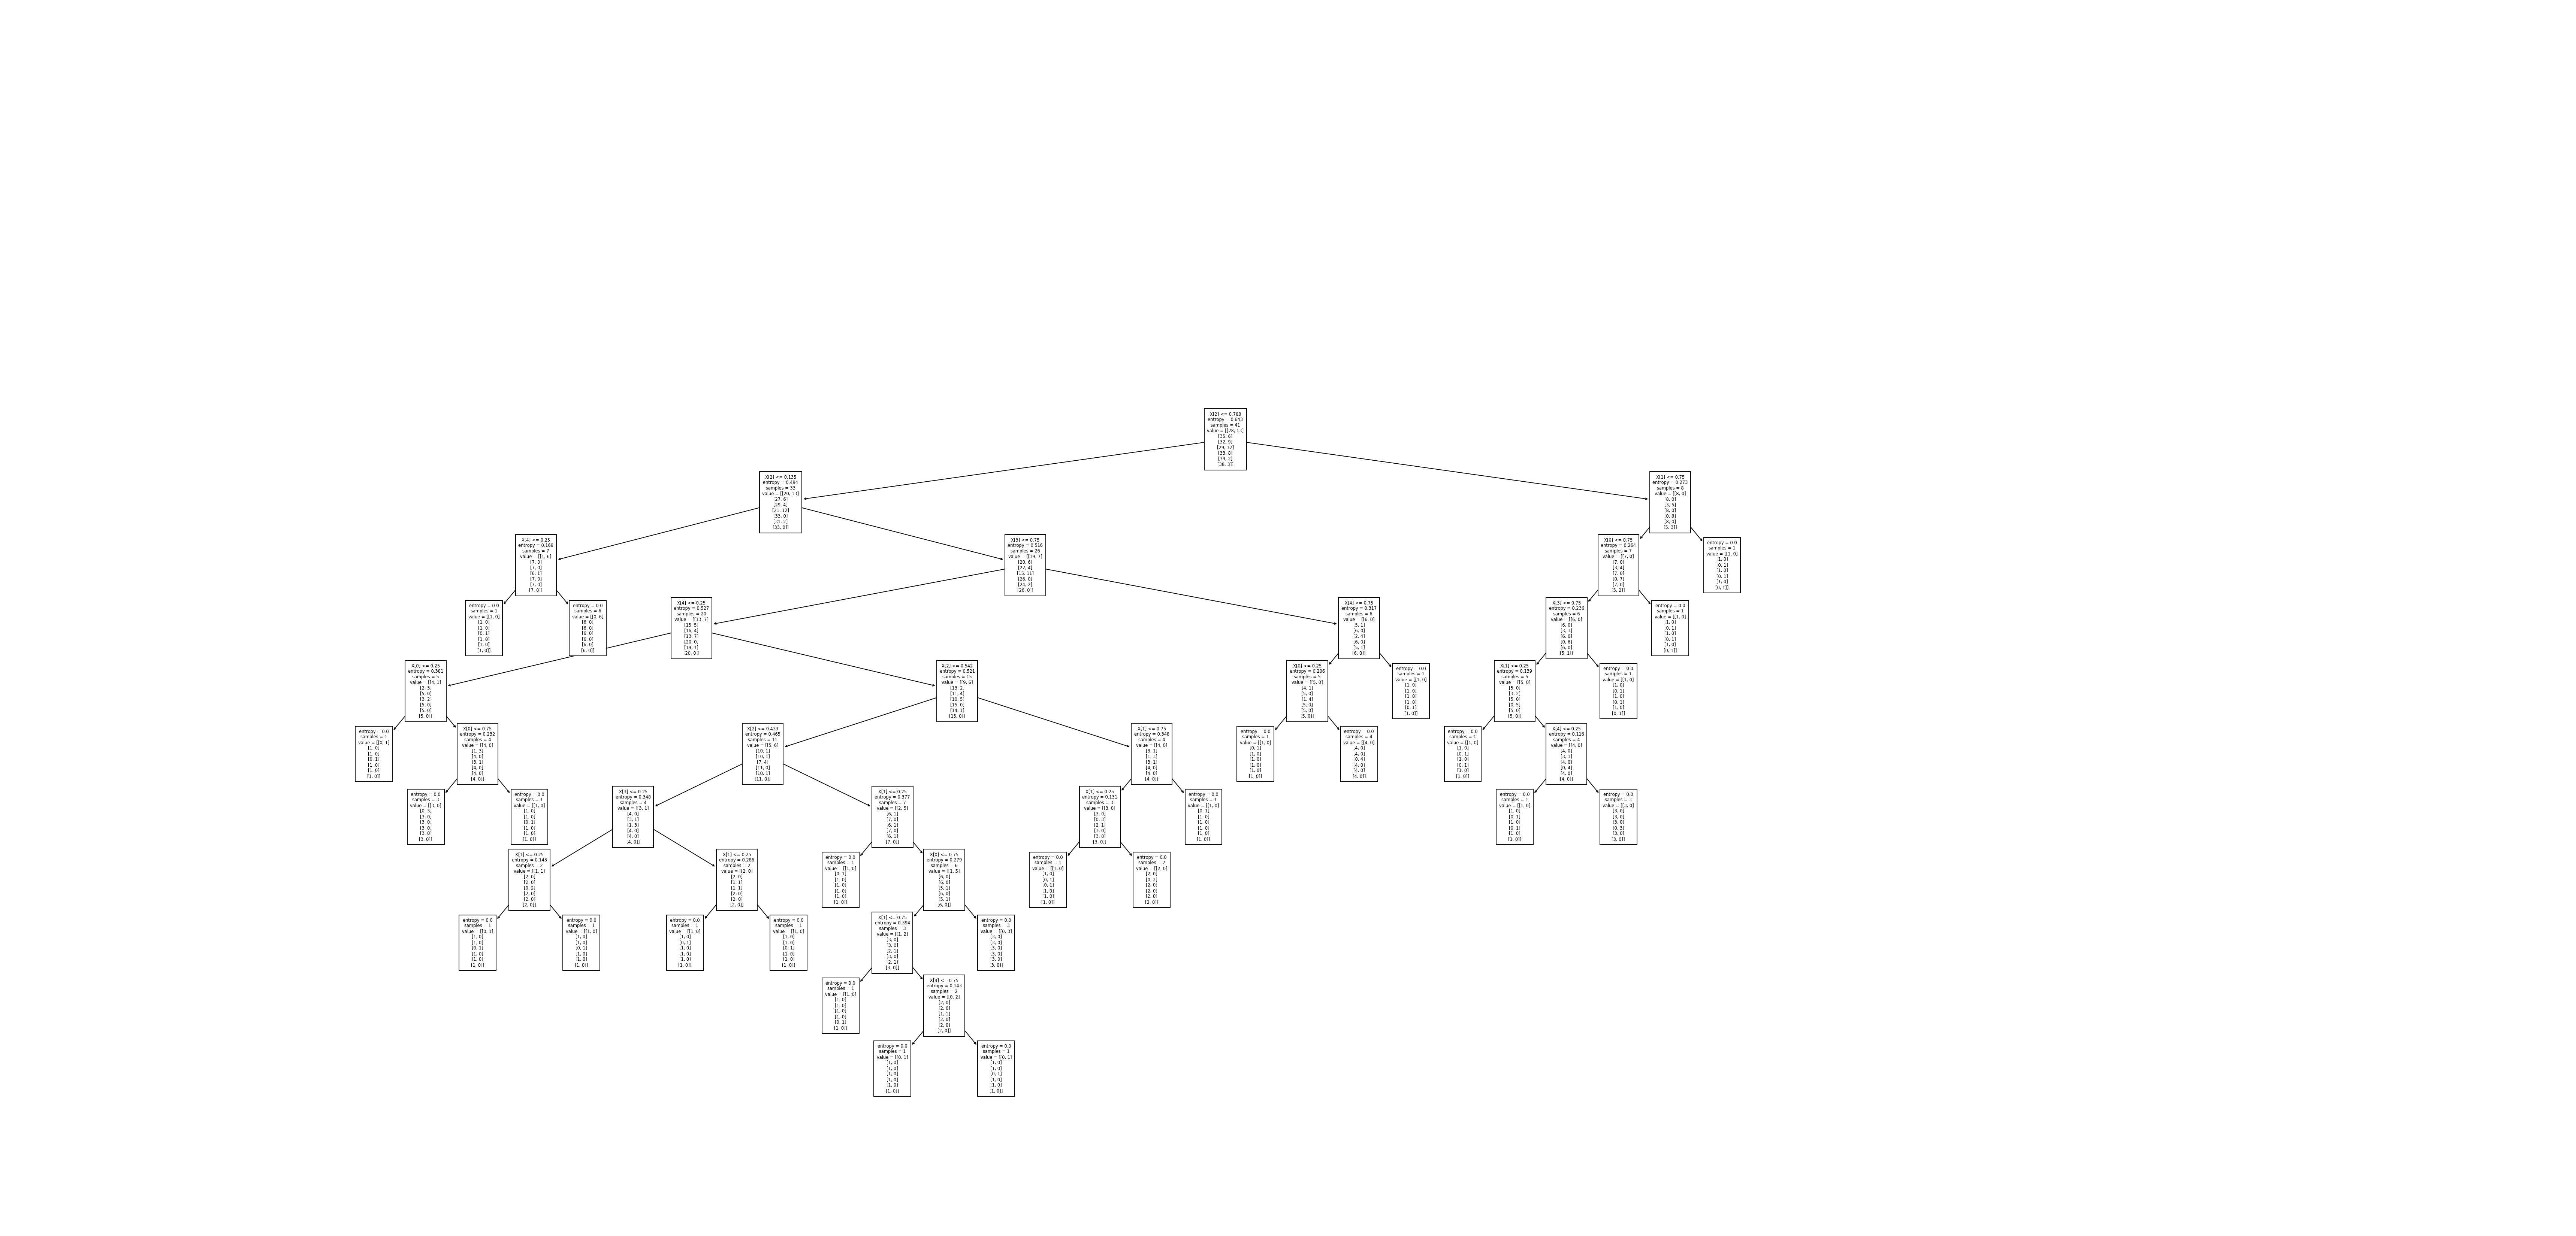

In [11]:
#best model is decision tree- below is fitting the model, drawing the tree, and then trimming the tree 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree

#with adjusted binary
tree_binary_adj = DecisionTreeClassifier(criterion='entropy', random_state=0).fit(X_array, y_binary_adj)
tree_cv_binary_adj = cross_val_score(tree_binary_adj, X_array, y_binary_adj, cv=40)
print("Accuracy tree_binary_adj: %0.2f (+/- %0.2f)" % (tree_cv_binary_adj.mean(), tree_cv_binary_adj.std() * 2)) 

node_indicator = tree_binary_adj.decision_path(X_array)
#print(node_indicator)

fig, ax = plt.subplots(figsize=(50, 24))
tree_binary_adj.score(X_array, y_binary_adj)
tree_binary_adj.predict(X_array)
tree.plot_tree(tree_binary_adj, fontsize=6)

#clf = tree.DecisionTreeClassifier()
#fig, ax = plt.subplots(figsize=(50, 24))
#tree.plot_tree(clf.fit(X, Y), fontsize=6)
plt.savefig('tree_high_dpi', dpi=100)

In [14]:
#part of trimming the tree 
path = tree_binary_adj.cost_complexity_pruning_path(X_array, y_binary_adj)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
ccp_alphas

array([0.        , 0.00696864, 0.00696864, 0.00845776, 0.00959891,
       0.01209778, 0.0134762 , 0.01689966, 0.02261402, 0.02318823,
       0.02357689, 0.02379415, 0.02432213, 0.02558901, 0.02886209,
       0.04161264, 0.19243461])

<IPython.core.display.Javascript object>


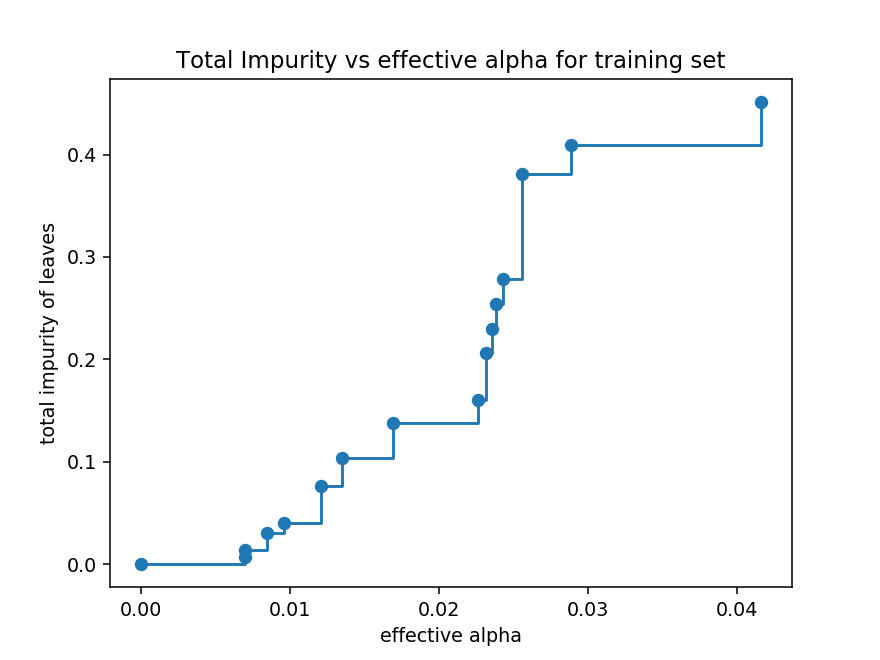

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

In [15]:
#part of trimming the tree 

fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [16]:
#part of trimming the tree 

clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_array, y_binary_adj)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))
clfs

Number of nodes in the last tree is: 1 with ccp_alpha: 0.1924346119505569


[DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=0, splitter='best'),
 DecisionTreeClassifier(ccp_alpha=0.006968641114982578, class_weight=None,
                        criterion='gini', max_depth=None, max_features=None,
                        max_leaf_nodes=None, min_impurity_decrease=0.0,
                        min_impurity_split=None, min_samples_leaf=1,
                        min_samples_split=2, min_weight_fraction_leaf=0.0,
                        presort='deprecated', random_state=0, splitter='best'),
 DecisionTreeClassifier(ccp_alpha=0.006968641114982578, class_weight=None,
                        criterion='gini', max_

<IPython.core.display.Javascript object>


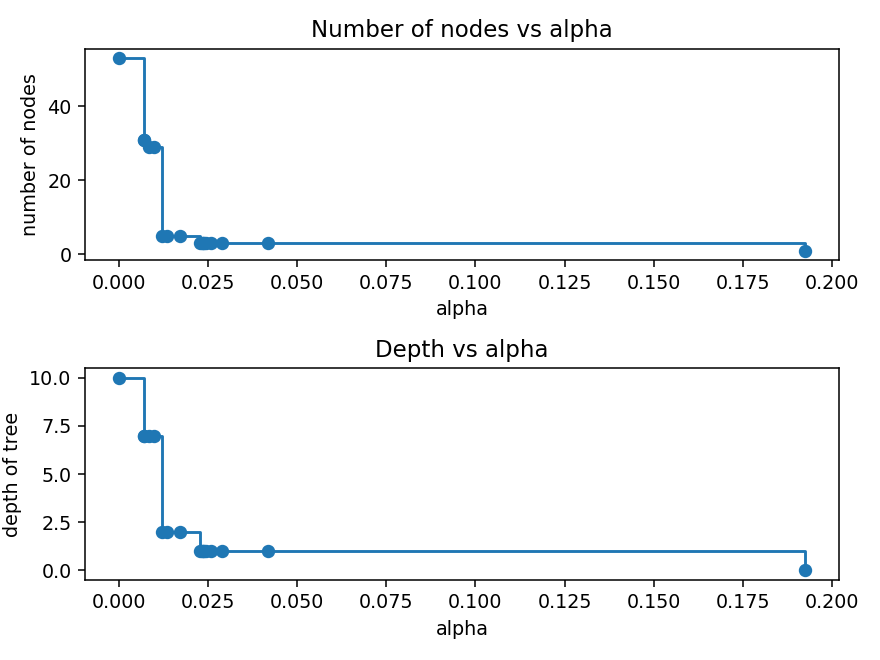

In [17]:
#part of trimming the tree 

#clfs = clfs[:-1]
#ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [20]:
#part of trimming the tree 

print (ccp_alphas)

[0.         0.00696864 0.00696864 0.00845776 0.00959891 0.01209778
 0.0134762  0.01689966 0.02261402 0.02318823 0.02357689 0.02379415
 0.02432213 0.02558901 0.02886209 0.04161264 0.19243461]


In [21]:
#error here is an accuracy ... oops, the naming is just confusing
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
loo_errors_binary_adj=[[], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []]
#X_array=np.asarray(X)
y_binary_adj_array=np.asarray(y_binary_adj)

for train_index, test_index in loo.split(X_array, y_binary_adj_array):
    X_train_ba, X_test_ba = X_array[train_index], X_array[test_index]
    y_train_ba, y_test_ba = y_binary_adj_array[train_index], y_binary_adj_array[test_index]
    
    tree_loo_binary_adj0=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=0, splitter='best').fit(X_train_ba, y_train_ba).score(X_test_ba, y_test_ba)
    loo_errors_binary_adj[0].append(tree_loo_binary_adj0)
    
    tree_loo_binary_adj1=DecisionTreeClassifier(ccp_alpha=0.006968641114982578, class_weight=None,
                        criterion='gini', max_depth=None, max_features=None,
                        max_leaf_nodes=None, min_impurity_decrease=0.0,
                        min_impurity_split=None, min_samples_leaf=1,
                        min_samples_split=2, min_weight_fraction_leaf=0.0,
                        presort='deprecated', random_state=0, splitter='best').fit(X_train_ba, y_train_ba).score(X_test_ba, y_test_ba)
    loo_errors_binary_adj[1].append(tree_loo_binary_adj1)
    
    tree_loo_binary_adj2=DecisionTreeClassifier(ccp_alpha=0.008457757791416973, class_weight=None,
                        criterion='gini', max_depth=None, max_features=None,
                        max_leaf_nodes=None, min_impurity_decrease=0.0,
                        min_impurity_split=None, min_samples_leaf=1,
                        min_samples_split=2, min_weight_fraction_leaf=0.0,
                        presort='deprecated', random_state=0, splitter='best').fit(X_train_ba, y_train_ba).score(X_test_ba, y_test_ba)
    loo_errors_binary_adj[2].append(tree_loo_binary_adj2)
    
    tree_loo_binary_adj3=DecisionTreeClassifier(ccp_alpha=0.009598911157364004, class_weight=None,
                        criterion='gini', max_depth=None, max_features=None,
                        max_leaf_nodes=None, min_impurity_decrease=0.0,
                        min_impurity_split=None, min_samples_leaf=1,
                        min_samples_split=2, min_weight_fraction_leaf=0.0,
                        presort='deprecated', random_state=0, splitter='best').fit(X_train_ba, y_train_ba).score(X_test_ba, y_test_ba)
    loo_errors_binary_adj[3].append(tree_loo_binary_adj3)
    
    tree_loo_binary_adj4=DecisionTreeClassifier(ccp_alpha=0.01209778289724285, class_weight=None,
                        criterion='gini', max_depth=None, max_features=None,
                        max_leaf_nodes=None, min_impurity_decrease=0.0,
                        min_impurity_split=None, min_samples_leaf=1,
                        min_samples_split=2, min_weight_fraction_leaf=0.0,
                        presort='deprecated', random_state=0, splitter='best').fit(X_train_ba, y_train_ba).score(X_test_ba, y_test_ba)
    loo_errors_binary_adj[4].append(tree_loo_binary_adj4)
    
    tree_loo_binary_adj5=DecisionTreeClassifier(ccp_alpha=0.013476197723884312, class_weight=None,
                        criterion='gini', max_depth=None, max_features=None,
                        max_leaf_nodes=None, min_impurity_decrease=0.0,
                        min_impurity_split=None, min_samples_leaf=1,
                        min_samples_split=2, min_weight_fraction_leaf=0.0,
                        presort='deprecated', random_state=0, splitter='best').fit(X_train_ba, y_train_ba).score(X_test_ba, y_test_ba)
    loo_errors_binary_adj[5].append(tree_loo_binary_adj5)

    
    tree_loo_binary_adj6=DecisionTreeClassifier(ccp_alpha=0.01689965782172539, class_weight=None,
                        criterion='gini', max_depth=None, max_features=None,
                        max_leaf_nodes=None, min_impurity_decrease=0.0,
                        min_impurity_split=None, min_samples_leaf=1,
                        min_samples_split=2, min_weight_fraction_leaf=0.0,
                        presort='deprecated', random_state=0, splitter='best').fit(X_train_ba, y_train_ba).score(X_test_ba, y_test_ba)
    loo_errors_binary_adj[6].append(tree_loo_binary_adj5)
    
    tree_loo_binary_adj7=DecisionTreeClassifier(ccp_alpha=0.022614024375167466, class_weight=None,
                        criterion='gini', max_depth=None, max_features=None,
                        max_leaf_nodes=None, min_impurity_decrease=0.0,
                        min_impurity_split=None, min_samples_leaf=1,
                        min_samples_split=2, min_weight_fraction_leaf=0.0,
                        presort='deprecated', random_state=0, splitter='best').fit(X_train_ba, y_train_ba).score(X_test_ba, y_test_ba)
    loo_errors_binary_adj[7].append(tree_loo_binary_adj6)
    
    tree_loo_binary_adj8=DecisionTreeClassifier(ccp_alpha=0.02318823007684179, class_weight=None,
                        criterion='gini', max_depth=None, max_features=None,
                        max_leaf_nodes=None, min_impurity_decrease=0.0,
                        min_impurity_split=None, min_samples_leaf=1,
                        min_samples_split=2, min_weight_fraction_leaf=0.0,
                        presort='deprecated', random_state=0, splitter='best').fit(X_train_ba, y_train_ba).score(X_test_ba, y_test_ba)
    loo_errors_binary_adj[8].append(tree_loo_binary_adj7)
    
    tree_loo_binary_adj9=DecisionTreeClassifier(ccp_alpha=0.023576894566288926, class_weight=None,
                        criterion='gini', max_depth=None, max_features=None,
                        max_leaf_nodes=None, min_impurity_decrease=0.0,
                        min_impurity_split=None, min_samples_leaf=1,
                        min_samples_split=2, min_weight_fraction_leaf=0.0,
                        presort='deprecated', random_state=0, splitter='best').fit(X_train_ba, y_train_ba).score(X_test_ba, y_test_ba)
    loo_errors_binary_adj[9].append(tree_loo_binary_adj8)
    
    tree_loo_binary_adj10=DecisionTreeClassifier(ccp_alpha=0.023794151300733226, class_weight=None,
                        criterion='gini', max_depth=None, max_features=None,
                        max_leaf_nodes=None, min_impurity_decrease=0.0,
                        min_impurity_split=None, min_samples_leaf=1,
                        min_samples_split=2, min_weight_fraction_leaf=0.0,
                        presort='deprecated', random_state=0, splitter='best').fit(X_train_ba, y_train_ba).score(X_test_ba, y_test_ba)
    loo_errors_binary_adj[10].append(tree_loo_binary_adj9)
    
    tree_loo_binary_adj11=DecisionTreeClassifier(ccp_alpha=0.024322125405387196, class_weight=None,
                        criterion='gini', max_depth=None, max_features=None,
                        max_leaf_nodes=None, min_impurity_decrease=0.0,
                        min_impurity_split=None, min_samples_leaf=1,
                        min_samples_split=2, min_weight_fraction_leaf=0.0,
                        presort='deprecated', random_state=0, splitter='best').fit(X_train_ba, y_train_ba).score(X_test_ba, y_test_ba)
    loo_errors_binary_adj[11].append(tree_loo_binary_adj10)
    
    tree_loo_binary_adj12=DecisionTreeClassifier(ccp_alpha=0.02558900616695555, class_weight=None,
                        criterion='gini', max_depth=None, max_features=None,
                        max_leaf_nodes=None, min_impurity_decrease=0.0,
                        min_impurity_split=None, min_samples_leaf=1,
                        min_samples_split=2, min_weight_fraction_leaf=0.0,
                        presort='deprecated', random_state=0, splitter='best').fit(X_train_ba, y_train_ba).score(X_test_ba, y_test_ba)
    loo_errors_binary_adj[12].append(tree_loo_binary_adj11)
    
    tree_loo_binary_adj13=DecisionTreeClassifier(ccp_alpha=0.028862086760113537, class_weight=None,
                        criterion='gini', max_depth=None, max_features=None,
                        max_leaf_nodes=None, min_impurity_decrease=0.0,
                        min_impurity_split=None, min_samples_leaf=1,
                        min_samples_split=2, min_weight_fraction_leaf=0.0,
                        presort='deprecated', random_state=0, splitter='best').fit(X_train_ba, y_train_ba).score(X_test_ba, y_test_ba)
    loo_errors_binary_adj[13].append(tree_loo_binary_adj12)
    
    tree_loo_binary_adj14=DecisionTreeClassifier(ccp_alpha=0.0416126402439006, class_weight=None,
                        criterion='gini', max_depth=None, max_features=None,
                        max_leaf_nodes=None, min_impurity_decrease=0.0,
                        min_impurity_split=None, min_samples_leaf=1,
                        min_samples_split=2, min_weight_fraction_leaf=0.0,
                        presort='deprecated', random_state=0, splitter='best').fit(X_train_ba, y_train_ba).score(X_test_ba, y_test_ba)
    loo_errors_binary_adj[14].append(tree_loo_binary_adj13)
    
    tree_loo_binary_adj15=DecisionTreeClassifier(ccp_alpha=0.1924346119505569, class_weight=None,
                        criterion='gini', max_depth=None, max_features=None,
                        max_leaf_nodes=None, min_impurity_decrease=0.0,
                        min_impurity_split=None, min_samples_leaf=1,
                        min_samples_split=2, min_weight_fraction_leaf=0.0,
                        presort='deprecated', random_state=0, splitter='best').fit(X_train_ba, y_train_ba).score(X_test_ba, y_test_ba)
    loo_errors_binary_adj[15].append(tree_loo_binary_adj14)
    
loo_errors_binary_adj_mean=np.mean(loo_errors_binary_adj, axis=1)
loo_errors_binary_adj_std=np.std(loo_errors_binary_adj, axis=1)
#print(loo_errors_mean[0])
#print(loo_errors_mean[1])
#print(loo_errors_mean[2])
#print("LeaveOneOut Error Knn: %0.2f (+/- %0.2f)" % (loo_error.mean(), MLP_cv_binary_adj.std() * 2))
print("LeaveOneOutError", loo_errors_binary_adj_mean)
print("LeaveOneOutStd", loo_errors_binary_adj_std)

#Use the forth one. 
#the score for this is a loo where In multi-label classification, this is the subset 
#accuracy which is a harsh metric since you require for each sample that each label set be correctly predicted.

LeaveOneOutError [0.26829268 0.34146341 0.34146341 0.36585366 0.19512195 0.19512195
 0.19512195 0.04878049 0.04878049 0.04878049 0.04878049 0.04878049
 0.04878049 0.04878049 0.04878049 0.04878049]
LeaveOneOutStd [0.44307078 0.47420054 0.47420054 0.48166872 0.39629456 0.39629456
 0.39629456 0.2154088  0.2154088  0.2154088  0.2154088  0.2154088
 0.2154088  0.2154088  0.2154088  0.2154088 ]


In [22]:
#decision tree model from above 
tree_binary_adj1_test=DecisionTreeClassifier(ccp_alpha=0.009598911157364004, class_weight=None,
                        criterion='gini', max_depth=None, max_features=None,
                        max_leaf_nodes=None, min_impurity_decrease=0.0,
                        min_impurity_split=None, min_samples_leaf=1,
                        min_samples_split=2, min_weight_fraction_leaf=0.0,
                        presort='deprecated', random_state=0, splitter='best')
tree_binary_adj1_test.fit(X_array, y_binary_adj)

#so the probability that the sample is the phase is the second column predict_proba

tree_binary_adj1_test.classes_

[array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1])]

# Predicts output/identity of unsampled space/full_factorialarray 

In [23]:
#code refits the trimmed decision tree model and then uses the fit model to predict the phase and probability of that phase 
tree_binary_adj1_test=DecisionTreeClassifier(ccp_alpha=0.009598911157364004, class_weight=None,
                        criterion='gini', max_depth=None, max_features=None,
                        max_leaf_nodes=None, min_impurity_decrease=0.0,
                        min_impurity_split=None, min_samples_leaf=1,
                        min_samples_split=2, min_weight_fraction_leaf=0.0,
                        presort='deprecated', random_state=0, splitter='best')
tree_binary_adj1_test.fit(X_array, y_binary_adj)

# outputting chosen decision tree model predict proba, which comes out in multilabel predict probab form 
#this is a problem for active learning codes 
#The predict proba gives us some challenges because for multilabel data it can produce an array for each output category
#This is just dealth with by using Alipy manual input of the predict proba
#predict proba is the fraction of samples of the same class in a leaf. 

Results=tree_binary_adj1_test.predict_proba(full_factorialarray)
#outputs as a (2389, 7) binary array 
Results2=tree_binary_adj1_test.predict(full_factorialarray)
#has issues with zero probability - can't remember if this was a problem in past 
Results3=tree_binary_adj1_test.predict_log_proba(full_factorialarray)

#print(multi_target_forest.predict_proba(X))

#Resultsdf = pd.DataFrame.from_records(data_transposed, columns=["A1", "A2", "B1", "B2", "C1", "C2", "D1", "D2", "E1", "E2", "F1", "F2"])
#Resultsdf
tree_binary_adj1_test.n_classes_
#list containing the number of classes for each output. (2 classes each for 7 phases)
#first column class 0 (not the phase), second column is class 1 (is the phase)
tree_binary_adj1_test.classes_


C:\Users\raera\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:952: RuntimeWarning: divide by zero encountered in log
  proba[k] = np.log(proba[k])


[array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1])]

In [24]:
#the shape of this output was not intuitive to me initially
# for seven phases there are 7 outputs with two classes each (0,1)
#predict proba gives the probability for each CLASS (which is eiher the class = sample is not the phase or class= is the phase) 
 
Results

[array([[1., 0.],
        [1., 0.],
        [1., 0.],
        ...,
        [1., 0.],
        [1., 0.],
        [1., 0.]]),
 array([[1., 0.],
        [1., 0.],
        [1., 0.],
        ...,
        [1., 0.],
        [1., 0.],
        [1., 0.]]),
 array([[1.   , 0.   ],
        [1.   , 0.   ],
        [1.   , 0.   ],
        ...,
        [0.375, 0.625],
        [0.375, 0.625],
        [0.375, 0.625]]),
 array([[0., 1.],
        [0., 1.],
        [0., 1.],
        ...,
        [1., 0.],
        [1., 0.],
        [1., 0.]]),
 array([[1., 0.],
        [1., 0.],
        [1., 0.],
        ...,
        [0., 1.],
        [0., 1.],
        [0., 1.]]),
 array([[1., 0.],
        [1., 0.],
        [1., 0.],
        ...,
        [1., 0.],
        [1., 0.],
        [1., 0.]]),
 array([[1.   , 0.   ],
        [1.   , 0.   ],
        [1.   , 0.   ],
        ...,
        [0.625, 0.375],
        [0.625, 0.375],
        [0.625, 0.375]])]

## Additional Error metrics for the model ( a side note- skip while looking at active learning)

In [25]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
tree_loo_pred_binary_adj=[[]]
#X_array=np.asarray(X)
y_binary_adj_array=np.asarray(y_binary_adj)

for train_index, test_index in loo.split(X_array, y_binary_adj_array):
    X_train_ba, X_test_ba = X_array[train_index], X_array[test_index]
    y_train_ba, y_test_ba = y_binary_adj_array[train_index], y_binary_adj_array[test_index]
    
    tree_loo_binary_adj1_pred=DecisionTreeClassifier(ccp_alpha=0.009598911157364004, class_weight=None, criterion='gini',
                        max_depth=None, max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=0, splitter='best').fit(X_train_ba, y_train_ba).predict(X_test_ba)
    tree_loo_pred_binary_adj[0].append(tree_loo_binary_adj1_pred)
    
a = np.array(tree_loo_pred_binary_adj)
a.shape = -1, 7
print(a.shape)
tree_loo_pred_binary_adj_df=pd.DataFrame(a, columns=['V2O5', 'xerogel', 'V3O7', 'lamellar', 'VO2', 'Z', 'V2O3'])

tree_loo_pred_binary_adj_df.to_excel("tree_loo_pred_binary_adj_allphase.xlsx")

tree_loo_RMSE = mean_squared_error(y_binary_adj_array, tree_loo_pred_binary_adj_df, squared=False)
tree_loo_RMSE
#SVR_loo_V2O5_RMSE = mean_squared_error(y_regression_V2O5, loo_pred_V205, squared=False)
#print("SVR LeaveOneOut V2O5 RMSE", SVR_loo_V2O5_RMSE)

(41, 7)


0.38707335735248616

In [26]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
tree_loo_predproba_binary_adj=[[]]
#X_array=np.asarray(X)
y_binary_adj_array=np.asarray(y_binary_adj)

for train_index, test_index in loo.split(X_array, y_binary_adj_array):
    X_train_ba, X_test_ba = X_array[train_index], X_array[test_index]
    y_train_ba, y_test_ba = y_binary_adj_array[train_index], y_binary_adj_array[test_index]
    
    tree_loo_binary_adj1_pred=DecisionTreeClassifier(ccp_alpha=0.009598911157364004, class_weight=None, criterion='gini',
                        max_depth=None, max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=0, splitter='best').fit(X_train_ba, y_train_ba).predict_proba(X_test_ba)
    tree_loo_predproba_binary_adj[0].append(tree_loo_binary_adj1_pred)
    
a = np.array(tree_loo_predproba_binary_adj)
#a.shape = -1, 7
a.shape 
#A shape is 1, 41, 6, 1, 2 and we want all the rows 41 and then the second column of the last one
reshape=a[:,:,:,:, 1]
reshape.shape
reshape
reshape.shape = -1, 7
reshape
#make a dataframe of shape and save it 

tree_loo_predproba_binary_adj_df=pd.DataFrame(reshape, columns=['V2O5', 'xerogel', 'V3O7', 'lamellar', 'VO2', 'Z', 'V2O3'])
tree_loo_predproba_binary_adj_df
tree_loo_predproba_binary_adj_df.to_excel("tree_loo_predproba_binary_adj_allphase.xlsx")
#tree_loo_predproba_binary_adj

#tree_loo_RMSE = mean_squared_error(y_binary_adj_array, tree_loo_pred_binary_adj_df, squared=False)
#tree_loo_RMSE
#SVR_loo_V2O5_RMSE = mean_squared_error(y_regression_V2O5, loo_pred_V205, squared=False)
#print("SVR LeaveOneOut V2O5 RMSE", SVR_loo_V2O5_RMSE)

## Back to : Using the trimmed decision tree to predict outputs for the full_factorialarray

In [27]:
#since input datatable lists presence of absence of phases (7 outputs (phases found)) as 0 - not present, 1, present 
#model fits the binary designation we put in place as 2 classes in each output
#second column of predict_proba from the decision tree is the equivalent to the 
#certainty that the reaction would produce a given phase 
#the inputs/what we want to predict are phases resulting from 2389 samples with 6 features

#Sklearn defines predict_proba as: "The predicted class probability is the fraction of samples of the same class in a leaf.""

#probability_class_1 = model.predict_proba(X)[:, 1]
#Results=tree_loo_binary_adj_test.predict_proba(full_factorialarray)[:, 1]
#mean_data = np.array(mean_data)
mean_data = np.array(Results)
sliced=mean_data[:, :, 1].transpose()
uncertainty_table = pd.DataFrame(sliced)
uncertainty_table.to_excel("tree_loo_predproba_binary_adj2ndcolumnBDFE.xlsx")

uncertainty_table

,0,1,2,3,4,5,6
0,0.0,0.0,0.000,1.0,0.0,0.0,0.000
1,0.0,0.0,0.000,1.0,0.0,0.0,0.000
2,0.0,0.0,0.000,1.0,0.0,0.0,0.000
3,0.0,0.0,0.000,1.0,0.0,0.0,0.000
4,0.0,0.0,0.000,1.0,0.0,0.0,0.000
...,...,...,...,...,...,...,...
1574,0.0,0.0,0.625,0.0,1.0,0.0,0.375
1575,0.0,0.0,0.625,0.0,1.0,0.0,0.375
1576,0.0,0.0,0.625,0.0,1.0,0.0,0.375
1577,0.0,0.0,0.625,0.0,1.0,0.0,0.375


# Using Alipy Query By Uncertainty to Select Next Samples 

In [80]:
#ALIPY active learning predictions for decision tree using uncertainty sampling 
#first chosen is on bottom not top 

#This gives uncertainty sampling methods, however, data layout doesn't work with all alipy aquisition functions
from alipy.query_strategy import (QueryInstanceQBC, QueryInstanceGraphDensity,
                                  QueryInstanceUncertainty, QueryRandom)
#QBCStrategy = QueryInstanceQBC(X, y)
#uncertainStrategy = QueryInstanceUncertainty(X, y)
#unlabel_index=full_factorialarray
#label_index=
#QueryInstanceUncertainty(X=None, y=None, measure='entropy').select(self, label_index, unlabel_index, model=tree_binary_adj1_test, batch_size=1)
#init(self, X=None, y=None, measure='entropy')

#X_train_ba, y_train_ba

#below code generates a 'batch' of high uncertainty samples to measure
#this is a simpler way to use Alipy, but would sample heavily from the same terminal node in the decision tree
#select_ind = QueryInstanceUncertainty(X=None, y=None, measure='entropy').select_by_prediction_mat(unlabel_index=full_factorialarray, predict=uncertainty_table, batch_size=5)
#select_ind

In [29]:
entropy_list=QueryInstanceUncertainty(X=None, y=None, measure='entropy').calc_entropy(predict_proba=uncertainty_table)
#because predict_proba is based on populations at the ends of nodes, there are only a select number of values for entropy produced. 
#if table is just ranked by entropy then sampled in order then very similar samples will be studied
#entropy_list

In [30]:
#looking at the data in more detail 

#creating excel sheet with the entropy versus sample descriptions
full_factorialarray_entropy=pd.DataFrame(full_factorialarray, columns=('Concentration', 'Time', 'Volume', 'Temperature', 'pH', 'BDFE'))
full_factorialarray_entropy['Entropy']=entropy_list
full_factorialarray_entropy.to_excel("full_factorialarray_entropy_pH2lvl_acidredoxok.xlsx")

#creating excel sheet with the entropy versus predict_proba values 
uncertainty_table_entropy=pd.DataFrame(uncertainty_table)
uncertainty_table_entropy['Entropy']=entropy_list
column_names=['V2O5', 'xerogel', 'V3O7', 'lamellar', 'VO2', 'Z', 'V2O3', 'Entropy']
uncertainty_table_entropy.columns = column_names
uncertainty_table_entropy.to_excel("uncertainty_table_entropy_pH2lvl_acidredoxok.xlsx")

#uncertainty_table_entropy.iloc[[1148]]
#full_factorialarray_entropy.iloc[[5]]

#full_factorialarray_entropy.loc[[5, "Entropy"]]


<IPython.core.display.Javascript object>


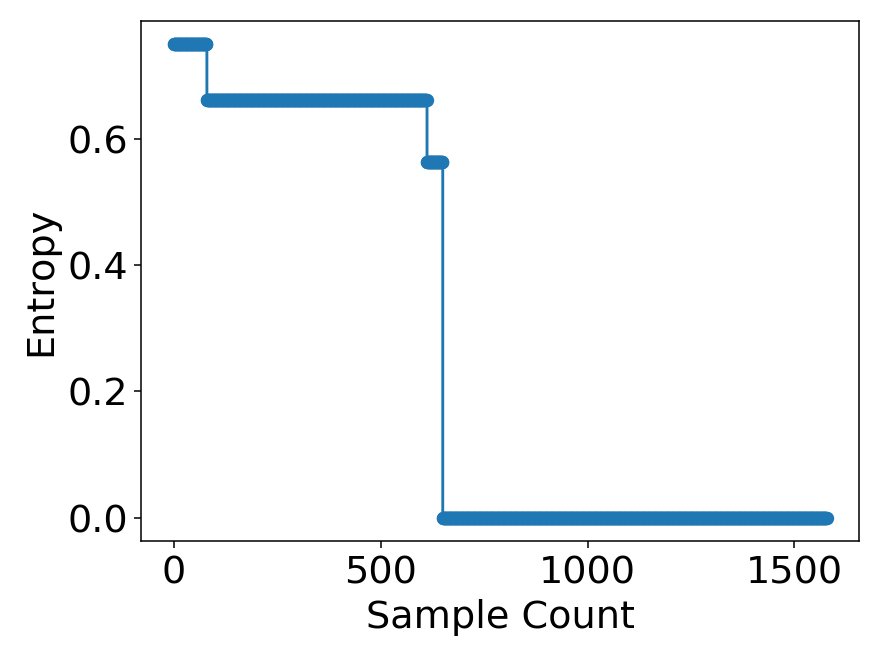

In [48]:
#plotting sample count versus entropy 
full_factorialarray_entropy_sorted=full_factorialarray_entropy.sort_values(by=['Entropy'], ascending=False, ignore_index=True)
index_entropy=full_factorialarray_entropy_sorted.index
fig, ax = plt.subplots()

ax.plot(index_entropy, full_factorialarray_entropy_sorted['Entropy'], marker='o', drawstyle="steps-post")
ax.set_xlabel("Sample Count", size=20)
ax.set_ylabel("Entropy", size=20)
ax.tick_params(axis='both', labelsize=20)
plt.tight_layout()

plt.savefig("Entropy_vs_SampleCount_acidredoxOK")

In [52]:
#sort the entropy table to only have first three largest entropies displayed in excel 

#had some discrepancies between decimal values excel displayed versus stored in pandas, used index to find values 
#full_factorialarray_entropy["Entropy"].iloc[1149]
#full_factorialarray_entropy["Entropy"].iloc[96]

ent=np.array(['0.7492430491132123', '0.661618500200214', '0.5624042221715982'])
full_factorialarray_entropy_highest=full_factorialarray_entropy.loc[full_factorialarray_entropy['Entropy'].isin(ent)]

full_factorialarray_entropy_highest 

,Concentration,Time,Volume,Temperature,pH,BDFE,Entropy
65,0.0,0.0,0.5,0.0,1.0,0.683077,0.562404
66,0.0,0.0,0.5,0.0,1.0,0.693333,0.562404
67,0.0,0.0,0.5,0.0,1.0,0.810256,0.562404
68,0.0,0.0,0.5,0.0,1.0,0.846154,0.562404
69,0.0,0.0,0.5,0.0,1.0,0.847179,0.562404
...,...,...,...,...,...,...,...
1574,1.0,1.0,1.0,1.0,1.0,0.847179,0.661619
1575,1.0,1.0,1.0,1.0,1.0,0.868718,0.661619
1576,1.0,1.0,1.0,1.0,1.0,0.988718,0.661619
1577,1.0,1.0,1.0,1.0,1.0,0.989744,0.661619


In [53]:
#recreate the entropy_highest DataFrame with just the true inputs, exclude the entropy column beacuase it would be included as an input otherwise 
full_factorialarray_entropy_highest_inputs=full_factorialarray_entropy_highest.drop(columns='Entropy')

# Below uses Manhattan Distances to find one next sample from highest entropy list - skip if using next section instead

#Code below calculates pairwise manhattan distances for pairs of samples in the unsampled space 
#only finds distance between the pairs, so once one is selected the next pair could be
#(and likely is) very close to the last pair values 
#a better option is in next section

#now that we have a table with all the samples in the first highest three entropies from ALIPY 
from sklearn.metrics.pairwise import manhattan_distances

#produces a pairwise matrix 1040x1040 which has distance as output for each pair 
#higher values further away, we want to sample those 
full_factorialarray_entropy_highest_inputs_distance=manhattan_distances(full_factorialarray_entropy_highest_inputs)

#inpect the data in more detail as an excel file 
#are distances all the same or heavily correlated with entropy values? -very difficult to check with 1040 samples, go ahead and reformat first
full_factorialarray_entropy_highest_inputs_distance_df=pd.DataFrame(full_factorialarray_entropy_highest_inputs_distance)
full_factorialarray_entropy_highest_inputs_distance_df.to_excel("manhattan_distances_from_entropy.xlsx")

#Once pairwise table is created keep only half of the pairs to get the useful part   
#fills in lower half which is duplicate information with NaN
full_factorialarray_entropy_highest_inputs_distance_halfdf=full_factorialarray_entropy_highest_inputs_distance_df.where(np.triu(np.ones(full_factorialarray_entropy_highest_inputs_distance_df.shape)).astype(np.bool))

#Removes those values and reformats the DataFrame so the information is legible
full_factorialarray_entropy_highest_inputs_distance_orgdf=full_factorialarray_entropy_highest_inputs_distance_halfdf.stack().reset_index()
#df = df.stack().reset_index()
full_factorialarray_entropy_highest_inputs_distance_orgdf.columns = ['Row','Column','Value']

##pd.DataFrame(full_factorialarray_entropy_highest_distance)
full_factorialarray_entropy_highest_inputs_distance_orgdf

#making it an excel table
full_factorialarray_entropy_highest_inputs_distance_orgdf.to_excel("manhattan_distances_from_entropy_sortedhalf.xlsx")


# Below instead uses k-means clustering to create n clusters and looks at ways to select n samples from those clusters 

In [54]:
#instead we can take the selected samples from the entropy list, cluster the inputs based on distance using k-means clustering or another clustering algorithm
#and then choose samples with maximum distance from each cluster to generate 

#Here the number of clusters could just equal however many samples we want to make, or we could do half what we need then select two highest  
#chose a random state of 42 to make the process deterministic 
#we don't expect the exact split here to really matter, nor do we really have a way to prove that it does/doesn't
from sklearn.cluster import KMeans
full_factorialarray_entropy_highest_inputs_kmeans = KMeans(n_clusters=20, random_state=42).fit(full_factorialarray_entropy_highest_inputs)

cluster_labels=full_factorialarray_entropy_highest_inputs_kmeans.labels_

#creates a new dataframe with the cluster numbers labeled
full_factorialarray_entropy_highest_cluster=full_factorialarray_entropy_highest.copy()
full_factorialarray_entropy_highest_cluster['cluster_number']=cluster_labels
full_factorialarray_entropy_highest

,Concentration,Time,Volume,Temperature,pH,BDFE,Entropy
65,0.0,0.0,0.5,0.0,1.0,0.683077,0.562404
66,0.0,0.0,0.5,0.0,1.0,0.693333,0.562404
67,0.0,0.0,0.5,0.0,1.0,0.810256,0.562404
68,0.0,0.0,0.5,0.0,1.0,0.846154,0.562404
69,0.0,0.0,0.5,0.0,1.0,0.847179,0.562404
...,...,...,...,...,...,...,...
1574,1.0,1.0,1.0,1.0,1.0,0.847179,0.661619
1575,1.0,1.0,1.0,1.0,1.0,0.868718,0.661619
1576,1.0,1.0,1.0,1.0,1.0,0.988718,0.661619
1577,1.0,1.0,1.0,1.0,1.0,0.989744,0.661619


# With n clusters, we can look at different ways to select samples from those clusters - only one of the options below is needed

# We could select the highest entropy sample from each cluster 

#Group by the cluster number and then within that select the highest entropy sample 
#but this just elminates the third entropy, which we aren't really trying to do because we are only looking at 
#three node terminations in the decision tree 
full_factorialarray_entropy_highest_cluster.loc[full_factorialarray_entropy_highest_cluster.groupby(by="cluster_number")['Entropy'].idxmax()]


# We could select the two samples furthest apart within each cluster

#Code below calculates pairwise manhattan distances for pairs of samples in each cluster 
#and lists out the details for the samples in the pairs with the highest distances
#This seems like a fine option for selecting samples from the clusters 
#because it shouldn't inherently eliminate samples in the third highest entropy class/terminal node in the decision tree we are considering exploring futher 
#randomly selecting samples within the cluster would also seem fine (we've already sorted by entropy and distance so a third level is probably not that helpful)
#after checking the distances in clusters there are many pairs with the same distance, this is fine and just means this step is more random choice than intended

from sklearn.metrics.pairwise import manhattan_distances
distances_grouped = full_factorialarray_entropy_highest_cluster.groupby('cluster_number')

furtherst_within_clusters=[[],[],[]]
selectedsamples_parameters=[]
data1 = pd.DataFrame([])

for name, group in distances_grouped:
    #pulls a single group each loop as dataframe
    clusterdf=distances_grouped.get_group(name)
    #remakes that dataframe with just the input values so that distances don't include distance based on cluster number and entropy
    banana1=clusterdf[['Concentration', 'Time', 'Volume', 'Temperature', 'pH', 'BDFE']]
    banana2=manhattan_distances(banana1)
    #applies the index names of banana1 to banana2 so that we have the full list index names rather than 0-x
    banana3=pd.DataFrame(banana2, index=banana1.index, columns=banana1.index)
    #finds index of the sample with highest distance in banana3 then puts as array
    indices=np.asarray(banana3.stack().index[np.argmax(banana3.values)])
    furtherst_within_clusters[0].append(indices[0])
    furtherst_within_clusters[1].append(indices[1])
    selectedsamples_parameters.append(clusterdf.loc[indices[0]])
    selectedsamples_parameters.append(clusterdf.loc[indices[1]])

#selectedsamples_parameters
data2 = pd.DataFrame(selectedsamples_parameters)
data2
#These samples don't vary much in BDFE.. which is likely because 0 and 1 would be the furthers away from one another for BDFE... 
# need to select randomly from the clusters instead. 
#clusterdf.loc[indices[1]]
#selectedsamples_parameters


# Or we could select randomly from each cluster. 

In [71]:
distances_grouped = full_factorialarray_entropy_highest_cluster.groupby('cluster_number')
#distances_grouped.size()
selected_samples_list2=[]

for name, group in distances_grouped:
    clusterdf2=distances_grouped.get_group(name)
    clusterdf_inputs2=clusterdf2[['Concentration', 'Time', 'Volume', 'Temperature', 'pH', 'BDFE', 'Entropy', 'cluster_number']]
    random_cluster_sample=clusterdf_inputs2.sample(n=1, replace=False, random_state=name, axis=0)
    squeezed_random_sample=random_cluster_sample.squeeze(axis=0)
    selected_samples_list2.append(squeezed_random_sample)
#Random_selected_samplespd = pd.DataFrame(selected_samples_list2)
Random_selected_samples=pd.DataFrame(selected_samples_list2)
#need to look at sample distributions 

Random_selected_samples.to_excel("alipy_cluster_selected_round2_pH2lvl_acidredoxok.xlsx")
Random_selected_samples

distances_grouped.Concentration

In [56]:
full_factorialarray_entropy_highest_cluster

,Concentration,Time,Volume,Temperature,pH,BDFE,Entropy,cluster_number
65,0.0,0.0,0.5,0.0,1.0,0.683077,0.562404,1
66,0.0,0.0,0.5,0.0,1.0,0.693333,0.562404,1
67,0.0,0.0,0.5,0.0,1.0,0.810256,0.562404,1
68,0.0,0.0,0.5,0.0,1.0,0.846154,0.562404,1
69,0.0,0.0,0.5,0.0,1.0,0.847179,0.562404,1
...,...,...,...,...,...,...,...,...
1574,1.0,1.0,1.0,1.0,1.0,0.847179,0.661619,6
1575,1.0,1.0,1.0,1.0,1.0,0.868718,0.661619,6
1576,1.0,1.0,1.0,1.0,1.0,0.988718,0.661619,6
1577,1.0,1.0,1.0,1.0,1.0,0.989744,0.661619,6


In [ ]:
dataframe.dtypes


#make a cv for each temp time combo with xvals is adjusted, yvals is volume, phase
Final_TimeTemp_Volume=[]
for i, j in TimeTempCombinations:  

    TimeTempdf=df.loc[(df['Concentration'] == i) & (df['Temperature'] == j)]
    freq = TimeTempdf.groupby('Time').size()
    
    TimeTempdf=TimeTempdf.sort_values('Time')
    
    width = 15     # the maximum width of each 'row' in the scatter plot
    xpos = j        # the centre position of the scatter plot in x
    max_offset = (width / freq.max())
    
    max_offset = int(np.nan_to_num(max_offset))
    
    offsets=[]
    
    for k in freq:
        if k == 1:
            offsets.append(0)
        else:
            offsets.extend(np.arange(k) - 0.5 * (k - 1))
    
    xvals = [x * max_offset for x in offsets]
    xvals = [x + xpos for x in xvals]
    TimeTempdf['xvals']=xvals
    Final_TimeTemp_Volume.append(TimeTempdf)
    
Final_TimeTemp_Volume = pd.concat(Final_TimeTemp_Volume)
    


groups2 = Final_TimeTemp_Volume.groupby('Phase')


<IPython.core.display.Javascript object>


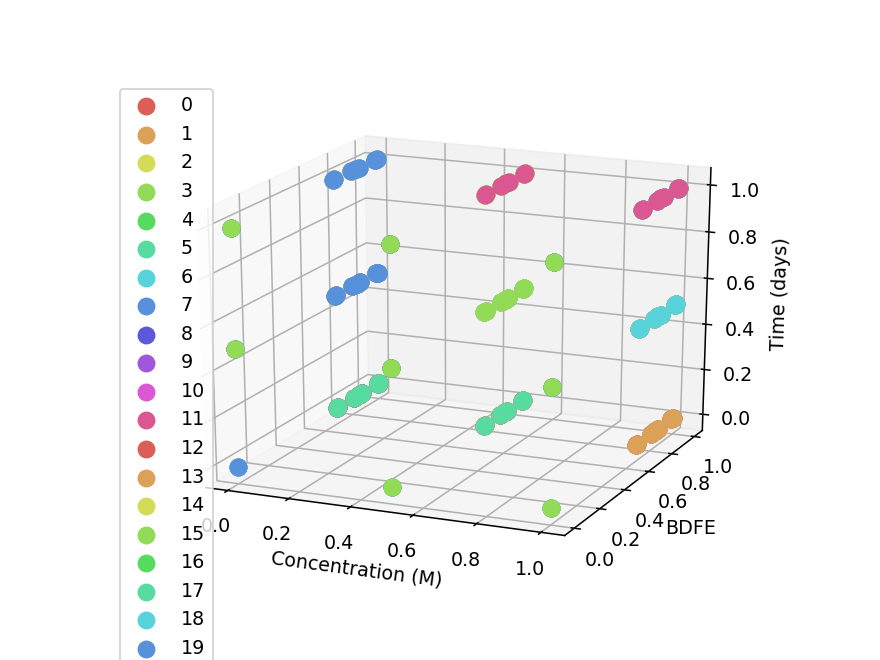

In [78]:
#plotting the clusters 
%matplotlib notebook
import seaborn as sns
sns.set_palette(sns.color_palette("hls", 12))

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for name, group in distances_grouped:
    
    ax.scatter3D(xs=group.Concentration, ys=group.BDFE, zs=group.Time, zdir='z', alpha=1, s=70, label=name, marker='o', depthshade=False)
    
ax.set_xlabel('Concentration (M)')
ax.set_ylabel('BDFE')
ax.set_zlabel('Time (days)')
#plt.xticks((200, 225, 250))
#plt.yticks((0.1, 0.3, 0.5))
ax.legend(loc='upper left')
plt.show()

#plt.savefig('TimeTemp_volume.png')    
